In [1]:
import utils as dmutils
from dataset import BatchDataset, ContinuousDataset
from dynamicmemory.DynamicMemoryModel import DynamicMemoryModel 
import dynamicmemory.DynamicMemoryModel as dmodel
import os
import pandas as pd
from py_jotools import mut, slurm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
#import catinous.evalfunctions as evalfu

In /home/mperkonigg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/mperkonigg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/mperkonigg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/mperkonigg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/mperkonigg/.local/lib/python3.6/site-packages/m

In [12]:
hparams = {
    'continuous': False,
    'datasetfile': '/project/catinous/cardiacslicessplitsingle.csv',
    'batch_size': 16,
    'training_batch_size': 16,
    'task': 'cardiac',
    'model': 'fcn',
    'scanner': None,
     'noncontinuous_steps': 1000,
    'noncontinuous_train_splits': ['base', 'train'],
    'order': ['Siemens', 'GE', 'Philips', 'Canon'],
    'use_memory': False
}


model, logs, df_cache, basemodel_lr = dmodel.trained_model(hparams)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type             | Params
------------------------------------------------
0 | model      | FCN              | 32 M  
1 | stylemodel | ResNet           | 25 M  
2 | loss       | CrossEntropyLoss | 0     


expname cardiac_batch_cardiacslicessplitsingle_base-train_1_d8d59b2ab4


/home/mperkonigg/.local/lib/python3.6/site-packages/pytorch_lightning/utilities/distributed.py:45: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  warnings.warn(*args, **kwargs)


KeyboardInterrupt: 

In [19]:
schedule = True

sparams = {
    'binary': '/home/cir/mperkonigg/env/catinous/bin/python',
    'cwd': '/home/cir/mperkonigg/catinous/catinous',
    'gpu': 1,
    'partition': 'centos7',
    'memory': 100000,
    'jobname': 'cardiac_batch',
    'outputpath': '/home/cir/mperkonigg/slurmoutput/',
    'mailuser': 'matthias.perkonigg@meduniwien.ac.at',
    'minutes': '240'}
hparams = {
    'continuous': False,
    'datasetfile': '/project/catinous/cardiacslicessplitsingle.csv',
    'batch_size': 16,
    'training_batch_size': 16,
    'task': 'cardiac',
    'model': 'fcn',
    'scanner': 'Siemens',
     'noncontinuous_steps': 1000,
    'noncontinuous_train_splits': ['base'],
    'use_memory': False
}

if schedule:
    slurm.srun(dmodel.trained_model, [hparams], params=sparams, remote=True)
else:
    model, logs, df_cache, basemodel_lr = dmodel.trained_model(hparams)

cardiac_batch44621
sshpass -f ~/.ssh/pass ssh cn1.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/cardiac_batch44621.job
Submitted batch job 3213694



In [14]:
sparams = {
    'binary': '/home/cir/mperkonigg/env/catinous/bin/python',
    'cwd': '/home/cir/mperkonigg/catinous/catinous',
    'gpu': 1,
    'partition': 'centos7',
    'memory': 100000,
    'jobname': 'cardiac_batch',
    'outputpath': '/home/cir/mperkonigg/slurmoutput/',
    'mailuser': 'matthias.perkonigg@meduniwien.ac.at',
    'minutes': '600',
    'cpusptask': 8}

hparams = {
    'continuous': False,
    'datasetfile': '/project/catinous/cardiacslicessplitsingle.csv',
    'batch_size': 16,
    'training_batch_size': 16,
    'task': 'cardiac',
    'model': 'fcn',
    'scanner': 'Canon',
     'noncontinuous_steps': 500,
    'noncontinuous_train_splits': ['base','train'],
    'use_memory': False
}


if schedule:
    slurm.srun(dmodel.trained_model, [hparams], params=sparams, remote=True)
else:
    model, logs, df_cache, basemodel_lr = dmodel.trained_model(hparams)

cardiac_batch78098
sshpass -f ~/.ssh/pass ssh mperkonigg@cn5.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/cardiac_batch78098.job
Submitted batch job 3204189



In [ ]:
schedule = True

sparams = {
    'binary': '/home/cir/mperkonigg/env/catinous/bin/python',
    'cwd': '/home/cir/mperkonigg/catinous/catinous',
    'gpu': 1,
    'partition': 'centos7',
    'memory': 100000,
    'jobname': 'cardiac_cont',
    'outputpath': '/home/cir/mperkonigg/slurmoutput/',
    'mailuser': 'matthias.perkonigg@meduniwien.ac.at',
    'minutes': '600',
    'cpusptask': 8}

hparams={'root_dir':'/project/catinous/',
         'datasetfile': '/project/catinous/cardiacslicessplitsingle.csv',
         'batch_size': 16,
         'training_batch_size': 16,
         'transition_phase_after':0.8,
         'memorymaximum': 64,
         'use_memory':True,
         'random_memory': True,
         'balance_memory': False,
         'order': ['Siemens', 'GE', 'Philips', 'Canon'],
         'continuous': True,
         'val_check_interval': 10,
        'base_model': 'cardiac_batch_cardiacslicessplitsingle_base_1_ebc3df72a1.pt', # cardiac_batch_cardiacslicessplit_base_1_7826e2e7a0
        'run_postfix': 1,
        'gram_weights': [1, 1, 1, 1],
        'dim': 2,
         'task': 'cardiac',
         'model': 'fcn',
         'seed': 1654130,
         'stylemodel': True,
         'pseudodomain_detection': True
        }

seeds = [1654130, 6654961, 5819225, 1215862, 132054]

for i in range(5):
    hparams['seed'] = seeds[i]
    hparams['run_postfix'] = i+1
    print(dmodel.cached_path(hparams), dmodel.is_cached(hparams))
    if schedule:
        slurm.srun(dmodel.trained_model, [hparams], params=sparams, remote=True)
    else:
        model, logs, df_cache, basemodel_lr = dmodel.trained_model(hparams)

In [2]:
schedule = True

sparams = {
    'binary': '/home/cir/mperkonigg/env/catinous/bin/python',
    'cwd': '/home/cir/mperkonigg/catinous/catinous',
    'gpu': 1,
    'partition': 'centos7',
    'memory': 100000,
    'jobname': 'cardiac_cont',
    'outputpath': '/home/cir/mperkonigg/slurmoutput/',
    'mailuser': 'matthias.perkonigg@meduniwien.ac.at',
    'minutes': '600',
    'cpusptask': 8}

hparams={'root_dir':'/project/catinous/',
         'datasetfile': '/project/catinous/cardiacslicessplitsingle.csv',
         'batch_size': 8,
         'training_batch_size': 16,
         'transition_phase_after':0.8,
         'memorymaximum': 64,
         'use_memory':True,
         'random_memory': True,
         'balance_memory': True,
         'order': ['Siemens', 'GE', 'Philips', 'Canon'],
         'continuous': True,
         'val_check_interval': 10,
        'base_model': 'cardiac_batch_cardiacslicessplitsingle_base_1_ebc3df72a1.pt', # cardiac_batch_cardiacslicessplit_base_1_7826e2e7a0
        'run_postfix': 1,
        'dim': 2,
         'task': 'cardiac',
         'model': 'fcn',
         'seed': 1654130,
         'stylemodel': True,
         'pseudodomain_detection': True,
        'balance_memory': True,
         'force_misclassified': True,
         'misclass_threshold': 0.8,
         'style_tile': True
        }

seeds = [1654130, 6654961, 5819225, 1215862, 132054]

for i in range(5):
    hparams['seed'] = seeds[i]
    hparams['run_postfix'] = i+1
    if schedule:
        slurm.srun(dmodel.trained_model, [hparams], params=sparams, remote=True)
    else:
        model, logs, df_cache, basemodel_lr = dmodel.trained_model(hparams)

cardiac_cont39042
sshpass -f ~/.ssh/pass ssh cn1.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/cardiac_cont39042.job
Submitted batch job 3224141

cardiac_cont86895
sshpass -f ~/.ssh/pass ssh cn1.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/cardiac_cont86895.job
Submitted batch job 3224142

cardiac_cont14398
sshpass -f ~/.ssh/pass ssh cn1.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/cardiac_cont14398.job
Submitted batch job 3224143

cardiac_cont08624
sshpass -f ~/.ssh/pass ssh cn1.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/cardiac_cont08624.job
Submitted batch job 3224144

cardiac_cont12795
sshpass -f ~/.ssh/pass ssh cn1.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/cardiac_cont12795.job
Submitted batch job 3224145



In [3]:
schedule = True

sparams = {
    'binary': '/home/cir/mperkonigg/env/catinous/bin/python',
    'cwd': '/home/cir/mperkonigg/catinous/catinous',
    'gpu': 1,
    'partition': 'centos7',
    'memory': 100000,
    'jobname': 'cardiac_cont',
    'outputpath': '/home/cir/mperkonigg/slurmoutput/',
    'mailuser': 'matthias.perkonigg@meduniwien.ac.at',
    'minutes': '600',
    'cpusptask': 8}

hparams={'root_dir':'/project/catinous/',
         'datasetfile': '/project/catinous/cardiacslicessplitsingle.csv',
         'batch_size': 8,
         'training_batch_size': 16,
         'transition_phase_after':0.8,
         'memorymaximum': 128,
         'use_memory':True,
         'random_memory': True,
         'balance_memory': True,
         'order': ['Siemens', 'GE', 'Philips', 'Canon'],
         'continuous': True,
         'val_check_interval': 10,
        'base_model': 'cardiac_batch_cardiacslicessplitsingle_base_1_ebc3df72a1.pt', # cardiac_batch_cardiacslicessplit_base_1_7826e2e7a0
        'run_postfix': 1,
        'dim': 2,
         'task': 'cardiac',
         'model': 'fcn',
         'seed': 1654130,
         'stylemodel': True,
         'pseudodomain_detection': True,
        'balance_memory': True,
         'force_misclassified': True,
         'misclass_threshold': 0.8,
         'style_tile': True
        }

seeds = [1654130, 6654961, 5819225, 1215862, 132054]

for i in range(5):
    hparams['seed'] = seeds[i]
    hparams['run_postfix'] = i+1
    if schedule:
        slurm.srun(dmodel.trained_model, [hparams], params=sparams, remote=True)
    else:
        model, logs, df_cache, basemodel_lr = dmodel.trained_model(hparams)

cardiac_cont77034
sshpass -f ~/.ssh/pass ssh cn1.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/cardiac_cont77034.job
Submitted batch job 3224146

cardiac_cont75957
sshpass -f ~/.ssh/pass ssh cn1.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/cardiac_cont75957.job
Submitted batch job 3224147

cardiac_cont74866
sshpass -f ~/.ssh/pass ssh cn1.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/cardiac_cont74866.job
Submitted batch job 3224148

cardiac_cont36209
sshpass -f ~/.ssh/pass ssh cn1.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/cardiac_cont36209.job
Submitted batch job 3224149

cardiac_cont22053
sshpass -f ~/.ssh/pass ssh cn1.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/cardiac_cont22053.job
Submitted batch job 3224150



In [2]:
schedule = True

sparams = {
    'binary': '/home/cir/mperkonigg/env/catinous/bin/python',
    'cwd': '/home/cir/mperkonigg/catinous/catinous',
    'gpu': 1,
    'partition': 'centos7',
    'memory': 100000,
    'jobname': 'cardiac_cont',
    'outputpath': '/home/cir/mperkonigg/slurmoutput/',
    'mailuser': 'matthias.perkonigg@meduniwien.ac.at',
    'minutes': '600',
    'cpusptask': 8}

hparams={'root_dir':'/project/catinous/',
         'datasetfile': '/project/catinous/cardiacslicessplitsingle.csv',
         'batch_size': 8,
         'training_batch_size': 16,
         'transition_phase_after':0.8,
         'memorymaximum': 128,
         'use_memory':True,
         'random_memory': True,
         'balance_memory': False,
         'force_misclassified': True,
         'misclass_threshold': 0.8,
         'order': ['Siemens', 'GE', 'Philips', 'Canon'],
         'continuous': True,
         'val_check_interval': 10,
        'base_model': 'cardiac_batch_cardiacslicessplitsingle_base_1_ebc3df72a1.pt', #'cardiac_batch_cardiacslicessplit_base_1_7826e2e7a0.pt',
        'run_postfix': 1,
        'gram_weights': [1, 1, 1, 1],
        'dim': 2,
         'task': 'cardiac',
         'model': 'fcn',
         'seed': 1654130,
         'stylemodel': True
        }


seeds = [1654130, 6654961, 5819225, 1215862, 132054]

for i in range(5):
    hparams['seed'] = seeds[i]
    hparams['run_postfix'] = i+1
    if schedule:
        slurm.srun(dmodel.trained_model, [hparams], params=sparams, remote=True)
    else:
        model, logs, df_cache, basemodel_lr = dmodel.trained_model(hparams)
        

cardiac_cont56443
sshpass -f ~/.ssh/pass ssh mperkonigg@cn5.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/cardiac_cont56443.job
Submitted batch job 3223616

cardiac_cont92363
sshpass -f ~/.ssh/pass ssh mperkonigg@cn5.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/cardiac_cont92363.job
Submitted batch job 3223617

cardiac_cont85607
sshpass -f ~/.ssh/pass ssh mperkonigg@cn5.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/cardiac_cont85607.job
Submitted batch job 3223618

cardiac_cont38647
sshpass -f ~/.ssh/pass ssh mperkonigg@cn5.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/cardiac_cont38647.job
Submitted batch job 3223619

cardiac_cont93341
sshpass -f ~/.ssh/pass ssh mperkonigg@cn5.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/cardiac_cont93341.job
Submitted batch job 3223620



In [54]:
schedule = True

sparams = {
    'binary': '/home/cir/mperkonigg/env/catinous/bin/python',
    'cwd': '/home/cir/mperkonigg/catinous/catinous',
    'gpu': 1,
    'partition': 'centos7',
    'memory': 100000,
    'jobname': 'cardiac_cont',
    'outputpath': '/home/cir/mperkonigg/slurmoutput/',
    'mailuser': 'matthias.perkonigg@meduniwien.ac.at',
    'minutes': '600',
    'cpusptask': 8}



hparams={'root_dir':'/project/catinous/',
         'datasetfile': '/project/catinous/cardiacslicessplitsingle.csv',
         'batch_size': 8,
         'training_batch_size': 16,
         'transition_phase_after':0.8,
         'memorymaximum': 128,
         'use_memory':False,
         'random_memory': True,
         'balance_memory': False,
         'order': ['Siemens', 'GE', 'Philips', 'Canon'],
         'continuous': True,
         'val_check_interval': 10,
        'base_model': 'cardiac_batch_cardiacslicessplitsingle_base_1_ebc3df72a1.pt',#'cardiac_batch_cardiacslicessplit_base_1_7826e2e7a0.pt',
        'run_postfix': 1,
        'dim': 2,
         'task': 'cardiac',
         'model': 'fcn',
         'seed': 1654130
        }


hparams={'root_dir':'/project/catinous/',
         'datasetfile': '/project/catinous/cardiacslicessplitsingle.csv',
         'batch_size': 8,
         'training_batch_size': 16,
         'transition_phase_after':0.8,
         'use_memory':False,
         'order': ['Siemens', 'GE', 'Philips', 'Canon'],
         'continuous': True,
         'val_check_interval': 10,
        'base_model': 'cardiac_batch_cardiacslicessplitsingle_base_1_ebc3df72a1.pt', #'cardiac_batch_cardiacslicessplit_base_1_7826e2e7a0.pt',
        'run_postfix': 1,
        'dim': 2,
         'task': 'cardiac',
         'model': 'fcn',
         'seed': 1654130,
         'stylemodel': True,
         'EWC': True,
         'EWC_lambda': 1,
         'EWC_bn_off': True
        }


seeds = [1654130, 6654961, 5819225, 1215862, 132054]

for i in range(5):
    hparams['seed'] = seeds[i]
    hparams['run_postfix'] = i+1
    if schedule:
        slurm.srun(dmodel.trained_model, [hparams], params=sparams, remote=True)
    else:
        model, logs, df_cache, basemodel_lr = dmodel.trained_model(hparams)

cardiac_cont68645
sshpass -f ~/.ssh/pass ssh mperkonigg@cn5.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/cardiac_cont68645.job
Submitted batch job 3222377

cardiac_cont50584
sshpass -f ~/.ssh/pass ssh mperkonigg@cn5.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/cardiac_cont50584.job
Submitted batch job 3222378

cardiac_cont18867
sshpass -f ~/.ssh/pass ssh mperkonigg@cn5.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/cardiac_cont18867.job
Submitted batch job 3222379

cardiac_cont29307
sshpass -f ~/.ssh/pass ssh mperkonigg@cn5.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/cardiac_cont29307.job
Submitted batch job 3222380

cardiac_cont23883
sshpass -f ~/.ssh/pass ssh mperkonigg@cn5.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/cardiac_cont23883.job
Submitted batch job 3222381



In [3]:
schedule = True

sparams = {
    'binary': '/home/cir/mperkonigg/env/catinous/bin/python',
    'cwd': '/home/cir/mperkonigg/catinous/catinous',
    'gpu': 1,
    'partition': 'centos7',
    'memory': 100000,
    'jobname': 'cardiac_cont',
    'outputpath': '/home/cir/mperkonigg/slurmoutput/',
    'mailuser': 'matthias.perkonigg@meduniwien.ac.at',
    'minutes': '600',
    'cpusptask': 8}

hparams={'root_dir':'/project/catinous/',
         'datasetfile': '/project/catinous/cardiacslicessplitsingle.csv',
         'batch_size': 8,
         'training_batch_size': 16,
         'transition_phase_after':0.8,
         'memorymaximum': 64,
         'use_memory':False,
         'random_memory': True,
         'balance_memory': False,
         'order': ['Siemens', 'GE', 'Philips', 'Canon'],
         'continuous': True,
         'val_check_interval': 10,
        'base_model': 'cardiac_batch_cardiacslicessplitsingle_base_1_ebc3df72a1.pt',#'cardiac_batch_cardiacslicessplit_base_1_7826e2e7a0.pt',
        'run_postfix': 1,
        'gram_weights': [1, 1, 1, 1],
        'dim': 2,
         'task': 'cardiac',
         'model': 'fcn',
         'seed': 1654130
        }


seeds = [1654130, 6654961, 5819225, 1215862, 132054]

for i in range(5):
        hparams['seed'] = seeds[i]
        hparams['run_postfix'] = i+1
        #print(dmodel.cached_path(hparams), dmodel.is_cached(hparams))
        if schedule:
            slurm.srun(dmodel.trained_model, [hparams], params=sparams, remote=True)
        else:
            model, logs, df_cache, basemodel_lr = dmodel.trained_model(hparams)

cardiac_cont71151
sshpass -f ~/.ssh/pass ssh mperkonigg@cn5.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/cardiac_cont71151.job
Submitted batch job 3221585

cardiac_cont10778
sshpass -f ~/.ssh/pass ssh mperkonigg@cn5.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/cardiac_cont10778.job
Submitted batch job 3221586

cardiac_cont52354
sshpass -f ~/.ssh/pass ssh mperkonigg@cn5.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/cardiac_cont52354.job
Submitted batch job 3221587

cardiac_cont86001
sshpass -f ~/.ssh/pass ssh mperkonigg@cn5.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/cardiac_cont86001.job
Submitted batch job 3221588

cardiac_cont14699
sshpass -f ~/.ssh/pass ssh mperkonigg@cn5.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/cardiac_cont14699.job
Submitted batch job 3221589



In [3]:
ds = ContinuousDataset.CardiacContinuous('/project/catinous/cardiacslicessplit.csv', order=['Siemens', 'GE', 'Philips', 'Canon'], seed=1654130)

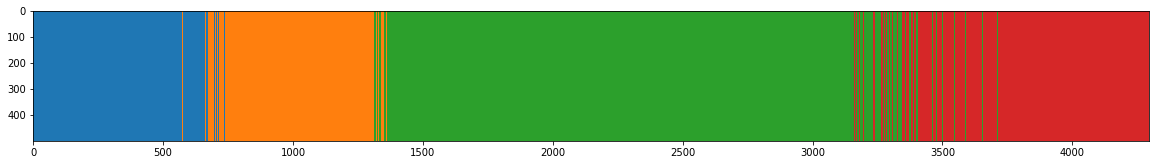

In [4]:
newcmp = ListedColormap([sns.color_palette()[0], sns.color_palette()[1], sns.color_palette()[2], sns.color_palette()[3]], name='OrangeBlue')
res = ds.df.scanner == 'Siemens'
res1 = ds.df.scanner == 'GE'
res2 = ds.df.scanner == 'Philips'
res3 = ds.df.scanner == 'Canon'
res[res1] = 2
res[res2] = 3
res[res3] = 4
plt.figure(figsize=(20,20))
plt.imshow(np.tile(res,(500,1)), cmap=newcmp)

In [14]:
sparams = {
    'binary': '/home/cir/mperkonigg/env/catinous/bin/python',
    'cwd': '/home/cir/mperkonigg/catinous/catinous',
    'gpu': 1,
    'partition': 'centos7',
    'memory': 100000,
    'jobname': 'eval_cardiac',
    'outputpath': '/home/cir/mperkonigg/slurmoutput/',
    'mailuser': 'matthias.perkonigg@meduniwien.ac.at',
    'minutes': '600',
    'cpusptask': 2}


hparams={'root_dir':'/project/catinous/',
         'datasetfile': '/project/catinous/cardiacslicessplitsingle.csv',
         'batch_size': 8,
         'training_batch_size': 16,
         'transition_phase_after':0.8,
         'memorymaximum': 64,
         'use_memory':True,
         'random_memory': True,
         'balance_memory': True,
         'order': ['Siemens', 'GE', 'Philips', 'Canon'],
         'continuous': True,
         'val_check_interval': 10,
        'base_model': 'cardiac_batch_cardiacslicessplitsingle_base_1_ebc3df72a1.pt', # cardiac_batch_cardiacslicessplit_base_1_7826e2e7a0
        'run_postfix': 1,
        'dim': 2,
         'task': 'cardiac',
         'model': 'fcn',
         'seed': 1654130,
         'stylemodel': True,
         'pseudodomain_detection': True,
        'balance_memory': True,
         'force_misclassified': True,
         'misclass_threshold': 0.8,
         'style_tile': True,
         'gram_weights': [1, 1]
        }

#hparams['force_misclassified'] = True
#hparams['misclass_threshold'] = 0.80

hparams = cutils.default_params(DynamicMemoryModel.get_default_hparams(), hparams)
seeds = [1654130, 6654961, 5819225, 1215862, 132054]

for i, seed in enumerate(seeds):
        hparams['seed']= seed
        hparams['run_postfix'] = i+1

        outputfile = f'/project/catinous/results/cardiac/{cutils.get_expname(hparams)}_dicescores.csv'

        #print(outputfile)
        slurm.srun(evalfu.eval_cardiac, [hparams, outputfile], params=sparams, remote=True)
        #evalfu.eval_cardiac(hparams, outputfile)

eval_cardiac27381
sshpass -f ~/.ssh/pass ssh cn1.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/eval_cardiac27381.job
Submitted batch job 3224204

eval_cardiac01584
sshpass -f ~/.ssh/pass ssh cn1.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/eval_cardiac01584.job
Submitted batch job 3224205

eval_cardiac28505
sshpass -f ~/.ssh/pass ssh cn1.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/eval_cardiac28505.job
Submitted batch job 3224206

eval_cardiac96164
sshpass -f ~/.ssh/pass ssh cn1.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/eval_cardiac96164.job
Submitted batch job 3224207

eval_cardiac42121
sshpass -f ~/.ssh/pass ssh cn1.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/eval_cardiac42121.job
Submitted batch job 3224208



In [13]:
hparams={'root_dir':'/project/catinous/',
         'datasetfile': '/project/catinous/cardiacslicessplitsingle.csv',
         'batch_size': 8,
         'training_batch_size': 16,
         'transition_phase_after':0.8,
         'memorymaximum': 64,
         'use_memory':True,
         'random_memory': True,
         'balance_memory': True,
         'order': ['Siemens', 'GE', 'Philips', 'Canon'],
         'continuous': True,
         'val_check_interval': 10,
        'base_model': 'cardiac_batch_cardiacslicessplitsingle_base_1_ebc3df72a1.pt', # cardiac_batch_cardiacslicessplit_base_1_7826e2e7a0
        'run_postfix': 1,
        'dim': 2,
         'task': 'cardiac',
         'model': 'fcn',
         'seed': 1654130,
         'stylemodel': True,
         'pseudodomain_detection': True,
        'balance_memory': True,
         'force_misclassified': True,
         'misclass_threshold': 0.8,
         'style_tile': True
        }

hparams = cutils.default_params(DynamicMemoryModel.get_default_hparams(), hparams)
seeds = [1654130, 6654961, 5819225, 1215862, 132054]

for i, seed in enumerate(seeds):
    hparams['seed']= seed
    hparams['run_postfix'] = i+1

    path_wo = dmodel.cached_path(hparams)
    hparams_new = hparams.copy()
    hparams_new['gram_weights'] = [1, 1]
    path_new = dmodel.cached_path(hparams_new)
    print(path_wo, path_new)
    os.rename(path_wo, path_new)

/project/catinous/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_mem_tf08_1_1053164045.pt /project/catinous/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_mem_tf08_1_b5ad2baace.pt
/project/catinous/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_mem_tf08_2_25ed3350c6.pt /project/catinous/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_mem_tf08_2_961b3e1970.pt
/project/catinous/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_mem_tf08_3_3146fc59e7.pt /project/catinous/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_mem_tf08_3_061f0c16b1.pt
/project/catinous/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_mem_tf08_4_4b7ce6b64e.pt /project/catinous/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_mem_tf08_4_3f4766cb5e.pt
/project/catinous/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_mem_tf08_5_f4036e

In [50]:
hparams = {'root_dir':'/project/catinous/',
         'datasetfile': '/project/catinous/cardiacslicessplitsingle.csv',
         'batch_size': 8,
         'training_batch_size': 16,
         'transition_phase_after':0.8,
         'memorymaximum': 128,
         'use_memory':True,
         'random_memory': True,
         'balance_memory': True,
         'order': ['Siemens', 'GE', 'Philips', 'Canon'],
         'continuous': True,
         'val_check_interval': 10,
        'base_model': 'cardiac_batch_cardiacslicessplitsingle_base_1_ebc3df72a1.pt', # cardiac_batch_cardiacslicessplit_base_1_7826e2e7a0
        'run_postfix': 1,
        'dim': 2,
        'gram_weights': [1],
         'task': 'cardiac',
         'model': 'fcn',
         'seed': 1654130,
         'stylemodel': True,
         'pseudodomain_detection': True,
        'balance_memory': True,
         'force_misclassified': True,
         'misclass_threshold': 0.8,
         'stylelayers': 1
        }

#hparams['force_misclassified'] = True
#hparams['misclass_threshold'] = 0.80

hparams = cutils.default_params(DynamicMemoryModel.get_default_hparams(), hparams)
seeds = [1654130, 6654961, 5819225, 1215862, 132054]

for i, seed in enumerate(seeds):
        hparams['seed']= seed
        hparams['run_postfix'] = i+1
        print(dmodel.cached_path(hparams),dmodel.is_cached(hparams))


        outputfile = f'/project/catinous/results/cardiac/{cutils.get_expname(hparams)}_dicescores.csv'

        #print(outputfile)
        #slurm.srun(evalfu.eval_cardiac, [hparams, outputfile], params=sparams, remote=True)
        #evalfu.eval_cardiac(hparams, outputfile)

/project/catinous/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_mem_tf08_1_8ee917d003.pt False
/project/catinous/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_mem_tf08_2_7c4abe9610.pt False
/project/catinous/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_mem_tf08_3_b802b891c7.pt False
/project/catinous/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_mem_tf08_4_eeb769f4d7.pt False
/project/catinous/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_mem_tf08_5_a818a10348.pt False


In [3]:
schedule = True

sparams = {
    'binary': '/home/cir/mperkonigg/env/catinous/bin/python',
    'cwd': '/home/cir/mperkonigg/catinous/catinous',
    'gpu': 1,
    'partition': 'centos7',
    'memory': 100000,
    'jobname': 'eval_cardiac',
    'outputpath': '/home/cir/mperkonigg/slurmoutput/',
    'mailuser': 'matthias.perkonigg@meduniwien.ac.at',
    'minutes': '240'}

hparams = {
    'continuous': False,
    'datasetfile': '/project/catinous/cardiacslicessplitsingle.csv',
    'batch_size': 16,
    'training_batch_size': 16,
    'task': 'cardiac',
    'model': 'fcn',
    'scanner': None,
     'noncontinuous_steps': 1000,
    'noncontinuous_train_splits': ['base', 'train'],
    'use_memory': False
}


hparams = cutils.default_params(DynamicMemoryModel.get_default_hparams(), hparams)

for scanner in [None, 'GE', 'Siemens', 'Philips', 'Canon']:
    hparams['scanner'] = scanner
    for i in range(5):
        hparams['run_postfix'] = i+1
        
        outputfile = f'/project/catinous/results/cardiac/{cutils.get_expname(hparams)}_dicescores.csv'

        #print(outputfile)
        slurm.srun(evalfu.eval_cardiac_batch, [hparams, outputfile], params=sparams, remote=True)

eval_cardiac32196
sshpass -f ~/.ssh/pass ssh mperkonigg@cn5.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/eval_cardiac32196.job
Submitted batch job 3218932

eval_cardiac85995
sshpass -f ~/.ssh/pass ssh mperkonigg@cn5.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/eval_cardiac85995.job
Submitted batch job 3218933

eval_cardiac01247
sshpass -f ~/.ssh/pass ssh mperkonigg@cn5.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/eval_cardiac01247.job
Submitted batch job 3218934

eval_cardiac46723
sshpass -f ~/.ssh/pass ssh mperkonigg@cn5.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/eval_cardiac46723.job
Submitted batch job 3218935

eval_cardiac20523
sshpass -f ~/.ssh/pass ssh mperkonigg@cn5.cir.meduniwien.ac.at sbatch --export=NONE --partition centos7 /scratch/eval_cardiac20523.job
Submitted batch job 3218936

eval_cardiac54413
sshpass -f ~/.ssh/pass ssh mperkonigg@cn5.cir.meduniwien.ac.at sbatch --

In [3]:
hparams={'root_dir':'/project/catinous/',
         'datasetfile': '/project/catinous/cardiacslicessplitsingle.csv',
         'batch_size': 16,
         'training_batch_size': 16,
         'transition_phase_after':0.8,
         'memorymaximum': 128,
         'use_memory':True,
         'random_memory': True,
         'balance_memory': False,
         #'force_misclassified': True,
         #'misclass_threshold': 0.8,
         'order': ['Siemens', 'GE', 'Philips', 'Canon'],
         'continuous': True,
         'val_check_interval': 10,
        'base_model': 'cardiac_batch_cardiacslicessplitsingle_base_1_ebc3df72a1.pt', #'cardiac_batch_cardiacslicessplit_base_1_7826e2e7a0.pt',
        'run_postfix': 1,
        'gram_weights': [1, 1, 1, 1],
        'dim': 2,
         'task': 'cardiac',
         'model': 'fcn',
         'seed': 1654130,
         'stylemodel': True
        }

dmodel.cached_path(hparams)

'/project/catinous/trained_models/cardiac_cont_cardiacslicessplitsingle_basemodel_batch_mem_tf08_1_5f7a07df57.pt'

In [ ]:
{'root_dir': '/project/catinous/', 'datasetfile': '/project/catinous/cardiacslicessplitsingle.csv', 'batch_size': 16, 'training_batch_size': 16, 'transition_phase_after': 0.8, 'memorymaximum': 128, 'use_memory': False, 'random_memory': True, 'balance_memory': False, 'order': ['Siemens', 'GE', 'Philips', 'Canon'], 'continuous': True, 'noncontinuous_steps': 3000, 'noncontinuous_train_splits': ['train', 'base_train'], 'val_check_interval': 10, 'base_model': 'cardiac_batch_cardiacslicessplitsingle_base_1_ebc3df72a1.pt', 'run_postfix': 1, 'dim': 2, 'task': 'cardiac', 'model': 'fcn', 'seed': 1654130}

In [3]:
hparams

{'root_dir': '/project/catinous/',
 'datasetfile': '/project/catinous/cardiacslicessplitsingle.csv',
 'batch_size': 16,
 'training_batch_size': 16,
 'transition_phase_after': 0.8,
 'memorymaximum': 128,
 'use_memory': False,
 'random_memory': True,
 'balance_memory': False,
 'order': ['Siemens', 'GE', 'Philips', 'Canon'],
 'continuous': True,
 'noncontinuous_steps': 3000,
 'noncontinuous_train_splits': ['train', 'base_train'],
 'val_check_interval': 10,
 'base_model': 'cardiac_batch_cardiacslicessplitsingle_base_1_ebc3df72a1.pt',
 'run_postfix': 1,
 'dim': 2,
 'task': 'cardiac',
 'model': 'fcn',
 'seed': 1654130}

In [20]:
hparams = {
    'continuous': False,
    'datasetfile': '/project/catinous/cardiacslicessplitsingle.csv',
    'batch_size': 16,
    'training_batch_size': 16,
    'task': 'cardiac',
    'model': 'fcn',
    'scanner': 'Siemens',
     'noncontinuous_steps': 1000,
    'noncontinuous_train_splits': ['base'],
    'use_memory': False
}
hparams = cutils.default_params(DynamicMemoryModel.get_default_hparams(), hparams)


outputfile = f'/project/catinous/results/cardiac/{cutils.get_expname(hparams)}_dicescores.csv'

evalfu.eval_cardiac(hparams, outputfile)

/project/catinous/trained_models/cardiac_batch_cardiacslicessplitsingle_base_1_ebc3df72a1.pt
Read: /project/catinous/trained_models/cardiac_batch_cardiacslicessplitsingle_base_1_ebc3df72a1.pt


In [5]:
cutils.get_expname(hparams)

'cardiac_batch_cardiacslicessplit_base_1_199f06e106'

In [10]:
df = pd.read_csv('/project/catinous/cardiacslicessplitsingle.csv')

In [12]:
df.groupby(['scanner', 'split']).count()

filepath     t  slice  slicepath
scanner split                                  
Canon   test        252   252    252        252
        train       758   758    758        758
        val         258   258    258        258
GE      test        246   246    246        246
        train       720   720    720        720
        val         248   248    248        248
Philips test        216   216    216        216
        train      2206  2206   2206       2206
        val         220   220    220        220
Siemens base       1120  1120   1120       1120
        test        228   228    228        228
        train       614   614    614        614
        val         234   234    234        234

In [2]:
hparams = {
    'continuous': False,
    'datasetfile': 'data/cardiacslicessplitsingle.csv',
    'batch_size': 16,
    'training_batch_size': 16,
    'task': 'cardiac',
    'model': 'fcn',
    'scanner': None,
     'noncontinuous_steps': 1000,
    'noncontinuous_train_splits': ['base', 'train'],
    'order': ['Siemens', 'GE', 'Philips', 'Canon'],
    'use_memory': False
}

In [1]:
import yaml
import utils as dmutils
from dataset import BatchDataset, ContinuousDataset
from dynamicmemory.DynamicMemoryModel import DynamicMemoryModel 
import dynamicmemory.DynamicMemoryModel as dmodel
import matplotlib.pyplot as plt

In /home/mperkonigg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/mperkonigg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/mperkonigg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/mperkonigg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/mperkonigg/.local/lib/python3.6/site-packages/m

In [2]:
with open('training_configs/cardiac_base.yml') as f:
    params= yaml.load(f, Loader=yaml.FullLoader)

In [3]:
model, logs, df_mem, exp_name = dmodel.trained_model(params['trainparams'], params['settings'])

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


expname cardiac_batch_cardiacdatasetsplit_base_1_42f2d8f159


/home/mperkonigg/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/mperkonigg/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/mperkonigg/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/mperkonigg/.local/lib/python3.6/site-packages/tensorflow/python/framework

In [2]:
with open('training_configs/cardiac_dynamicmemory.yml') as f:
    params= yaml.load(f, Loader=yaml.FullLoader)

In [3]:
model, logs, df_mem, exp_name = dmodel.trained_model(params['trainparams'], params['settings'])

GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: False, using: 0 TPU cores
INFO:lightning:TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


output/trained_models/cardiac_batch_cardiacdatasetsplit_base_1_42f2d8f159.pt
expname cardiac_cont_cardiacdatasetsplit_basemodel_batch_mem_tf08_1_7acaf79988


/home/mperkonigg/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/mperkonigg/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/mperkonigg/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/mperkonigg/.local/lib/python3.6/site-packages/tensorflow/python/framework

['Siemens', 'GE', 'Philips', 'Canon']


/home/mperkonigg/.local/lib/python3.6/site-packages/pytorch_lightning/utilities/distributed.py:45: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  warnings.warn(*args, **kwargs)
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/mperkonigg/.local/lib/python3.6/site-packages/pytorch_lightning/trainer/trainer.py", line 482, in train
    self.train_loop.run_training_epoch()
  File "/home/mperkonigg/.local/lib/python3.6/site-packages/pytorch_lightning/trainer/training_loop.py", line 569, in run_training_epoch
    self.trainer.run_evaluation(test_mode=False)
  File "/home/mperkonigg/.local/lib/python3.6/site-packages/pytorch_lightning/trainer/trainer.py", line 567, in run_evaluation
    output = self.evaluation_loop.evaluation_step(test_mode, batch, batch_idx, dataloader_idx)
  File "/home/mperkonigg/.local/lib/python3.6/site-packages/pytorch_lightning/trainer/evaluation_loop.py", line 171, in evaluation_step
    output = self.trainer.accelerator_backend.validation_step(args)
  File "/home/mperkonigg/.local/lib/python3.6/site-packages/pytorch_lightning/accelerators/gpu_accelerator.py", line 78, in validation_step
    output = self.__validation_step(args)
  File "/hom

TypeError: object of type 'NoneType' has no len()